# Statistical Pattern Recognition - Solution 4: Nonparametric methods

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from pathlib import Path

## $\star$ Part 1: K-nearest neighbors

Load the data from dataset.npz and split it evenly into a training set
and a test set. 

Each sample consists of a point in 2D and a class label
$\{1,2,3\}$.

For each point in the test set, predict its label by a k-nearest
neighbor classifier “trained” using the training set. 

Compute the **average classification error** using the true labels of the test set. 

Visualize the training and test points with their respective label, as well as the classifier's decision boundary using a **contour plot** (see example at the bottom).

Repeat for different values of k.


In [28]:

# load the data and split it into train and test sets
# START TODO ################
data_dir = Path('../data')
file_path = data_dir / 'dataset.npz'


try:
    with np.load(file_path) as data:
        print('Keys in the files: ', data.files)
        for key in data.files:
            dataset = data[key]
            print(f"{key}: {dataset.shape}")
            print(f"{key} first 5 elements: {dataset[:5]}")

        X = dataset[: , :-1]
        Y = dataset[: , 2]
        print(f"X shape: {X.shape}, Y shape: {Y.shape}")
        # Split the dataset into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state=42, stratify = Y)
        data_train = (X_train, Y_train)
        data_test = (X_test, Y_test)

except FileNotFoundError:
    print(f"File {file_path} not found. Please check the path.")


# END TODO ################

# check that the data and the split shapes are correct
# START TODO ################
# here we check whether the data is equally split
# between test and train sets
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")
# END TODO ################


Keys in the files:  ['arr_0']
arr_0: (280, 3)
arr_0 first 5 elements: [[1.80362136 4.42291442 3.        ]
 [3.46150668 4.14357878 2.        ]
 [2.18733102 3.9963879  1.        ]
 [3.09326567 2.90556508 1.        ]
 [1.75855296 2.41093474 1.        ]]
X shape: (280, 2), Y shape: (280,)
X_train shape: (140, 2), Y_train shape: (140,)
X_test shape: (140, 2), Y_test shape: (140,)


Average classification error (k = 2) :  0.11428571428571428


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


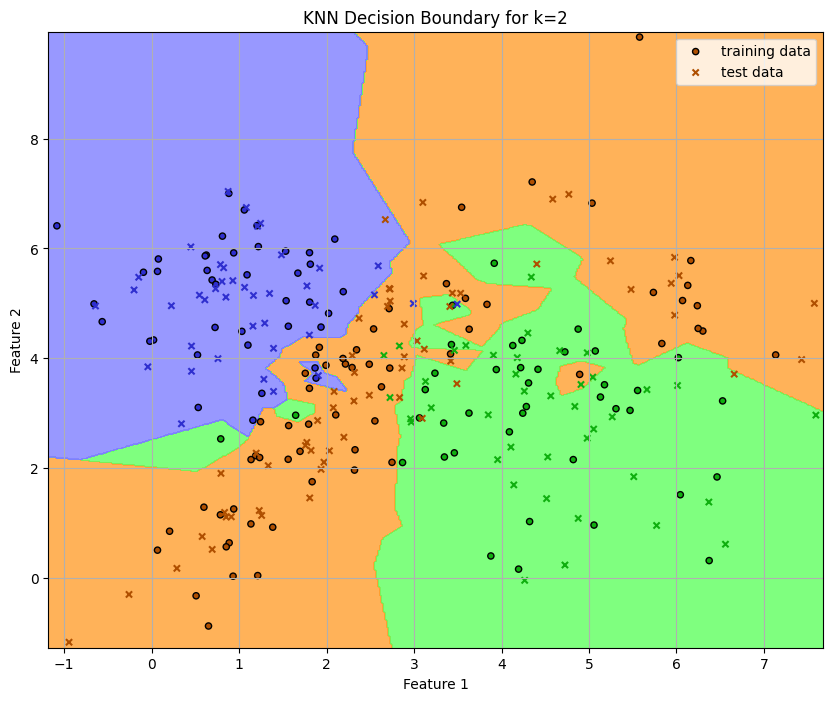

In [32]:
# train and plot the k-nearest neighbors classifier
def plot_k_neighbors(k, data_train, data_test, classifier=KNeighborsClassifier):
    """
    k: Number of neighbors to use
    data_train: subsection of the dataset that is to be used for training
    data_test subsection of the dataset that is to be used for testing

    For more information on the KNeighborsClassifier see:
    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    """
    # START TODO ################

    data_train = (X_train, Y_train)
    data_test = (X_test, Y_test)

    neigh = KNeighborsClassifier(k, weights='distance', algorithm = 'auto')
    neigh.fit(X_train, Y_train)

    Y_pred = neigh.predict(X_test)

    #Compute average classification error
    error = np.mean(Y_pred != Y_test)
    print(f'Average classification error (k = {k}) : {error : }')

    
    #Visualize decision boundary
    cmap_light = ListedColormap(['#ff9f2f', '#5fff5f', '#7f7fff'])
    cmap_bold = ListedColormap(['#af4f00', '#0faf0f', '#2f2fcf'])
    
    all_X_cords = np.vstack((X_train, X_test))
    x_min, x_max = all_X_cords[: , 0].min(), all_X_cords[: , 0].max()
    y_min , y_max = all_X_cords[: , 1].min(), all_X_cords[: , 1].max()

    border_size = 0.1 # You can adjust this value
    x_min -= border_size; x_max += border_size
    y_min -= border_size; y_max += border_size

    #Creating the meshgrid

    grid_size = 0.02
    x_range_grid = np.arange(x_min, x_max, grid_size)
    y_range_grid = np.arange(y_min, y_max, grid_size)

    xx , yy = np.meshgrid(x_range_grid, y_range_grid)
    X_grid_flat = np.column_stack((xx.ravel(), yy.ravel()))
    
    #make predictions
    Z_flat_predictions = neigh.predict(X_grid_flat)
    Z_reshaped = Z_flat_predictions.reshape(xx.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z_reshaped, cmap = cmap_light, alpha = 0.8)

    plt.scatter(X_train[: , 0], X_train[: , 1], c = Y_train, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'training data', marker = 'o')
    plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.title(f'KNN Decision Boundary for k={k}') 
    plt.legend()
    plt.grid(True)
    plt.show()

    # END TODO ################

plot_k_neighbors(2, data_train, data_test)


Average classification error (k = 1) :  0.11428571428571428


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


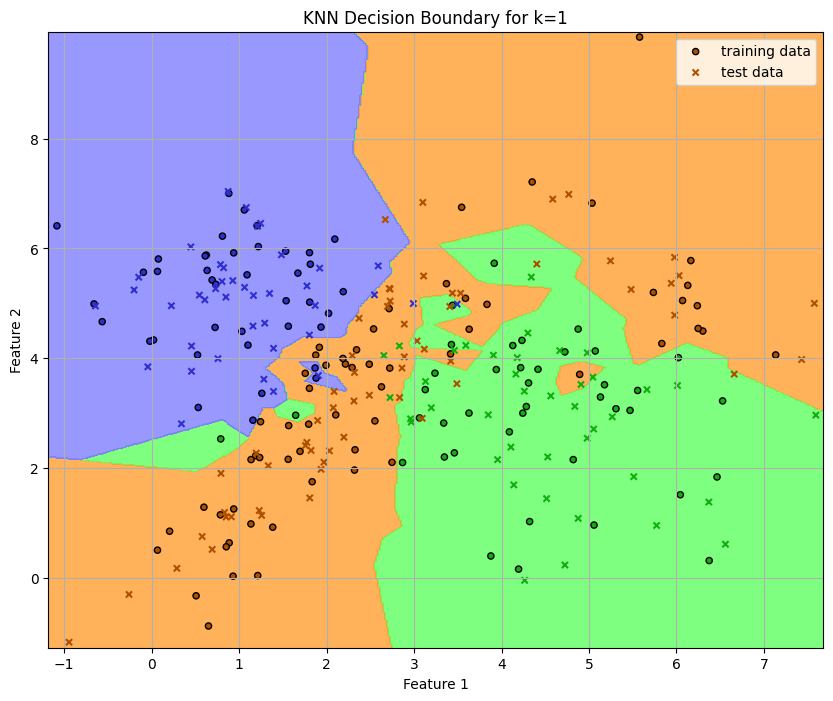

Average classification error (k = 2) :  0.11428571428571428


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


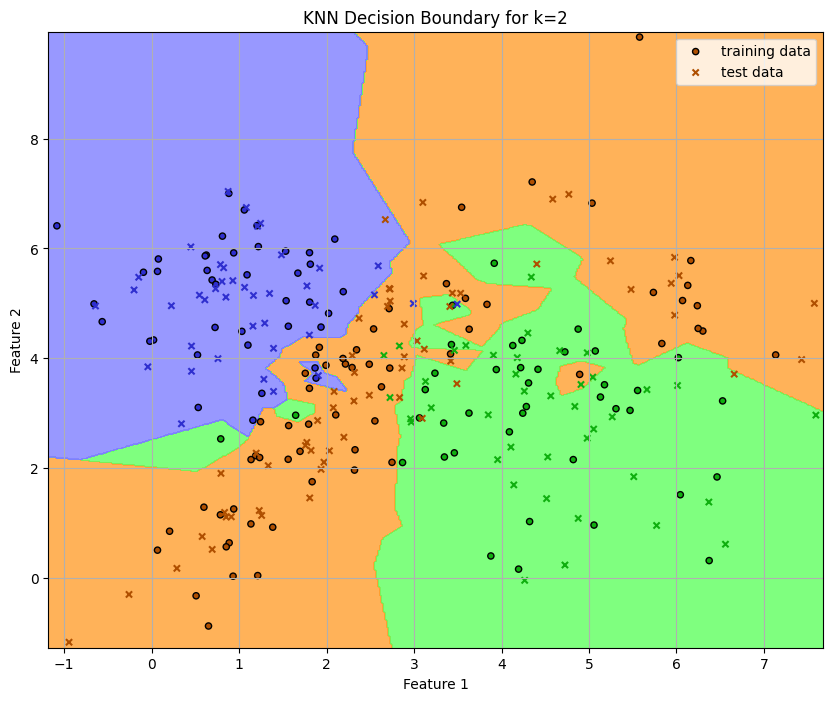

Average classification error (k = 3) :  0.12142857142857143


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


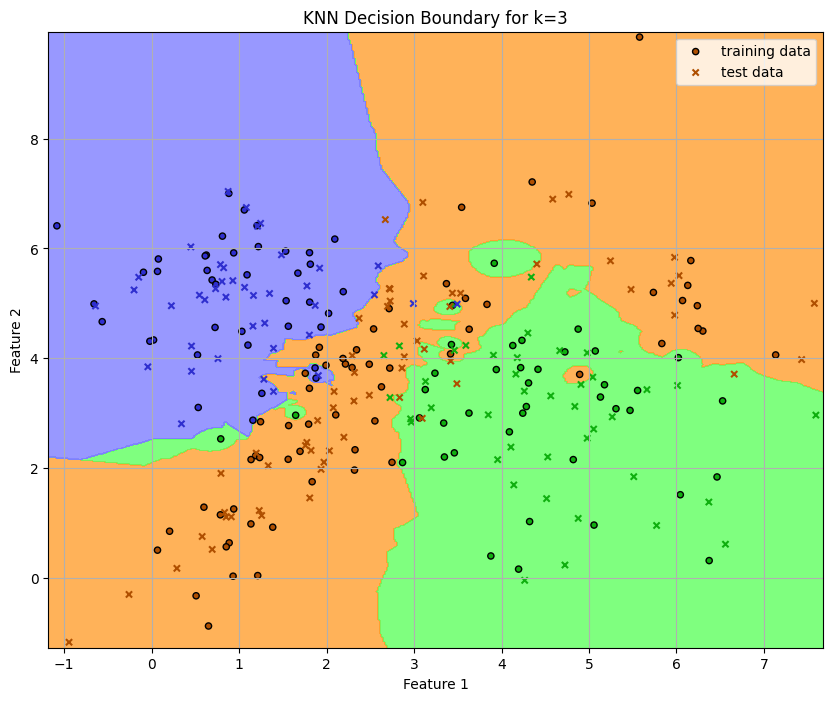

Average classification error (k = 4) :  0.10714285714285714


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


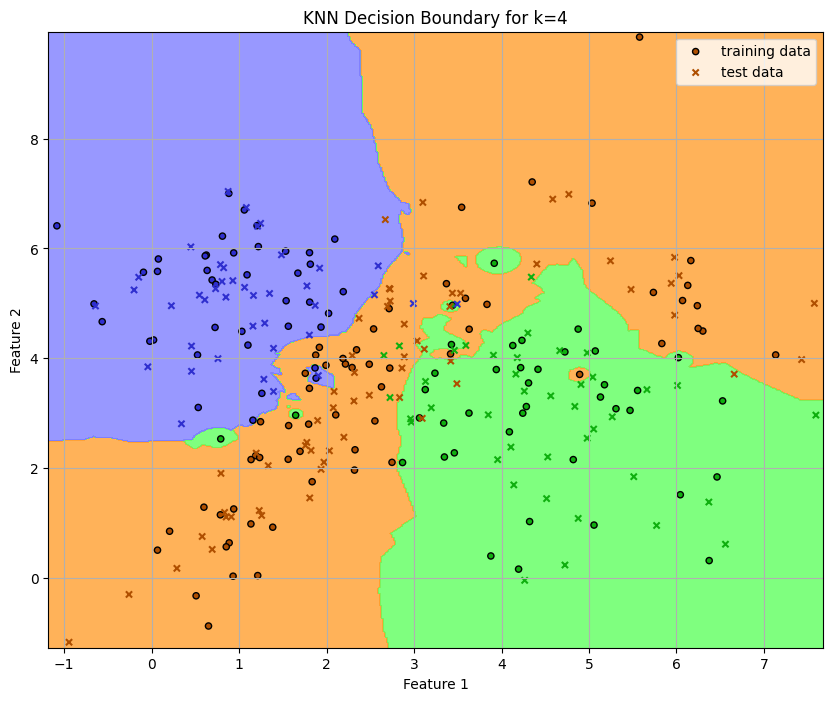

Average classification error (k = 5) :  0.09285714285714286


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


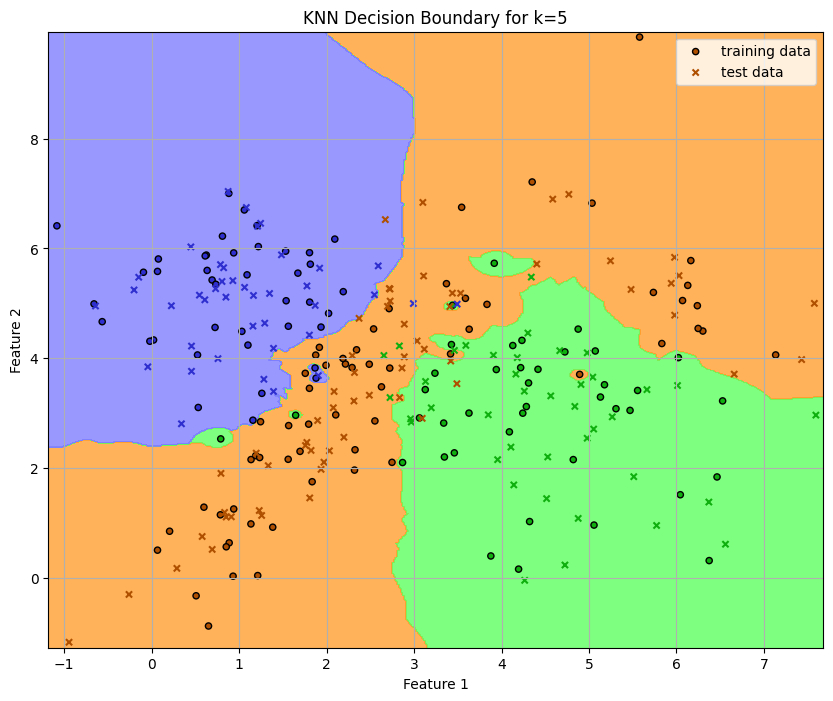

Average classification error (k = 6) :  0.08571428571428572


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


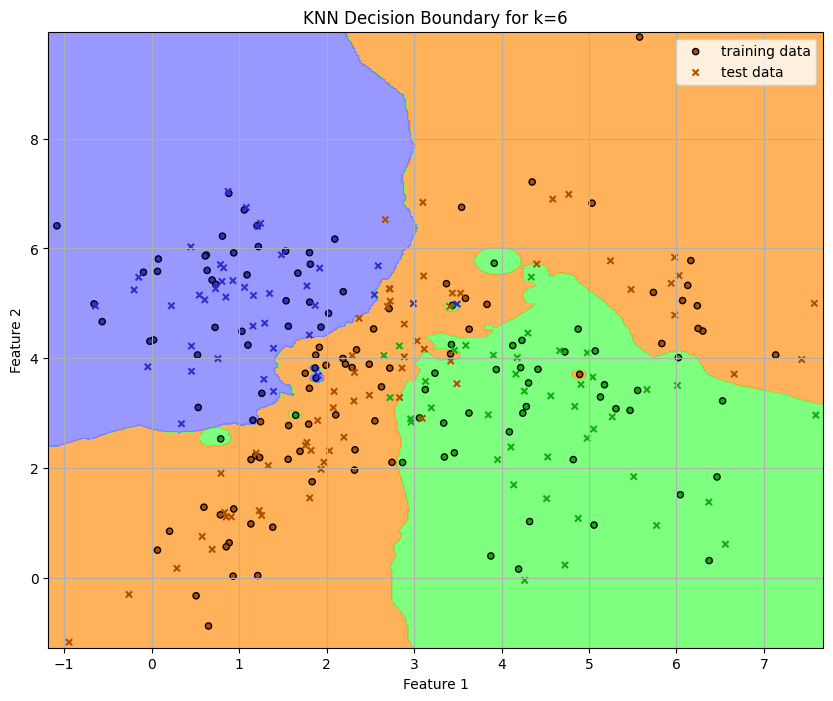

Average classification error (k = 7) :  0.07857142857142857


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


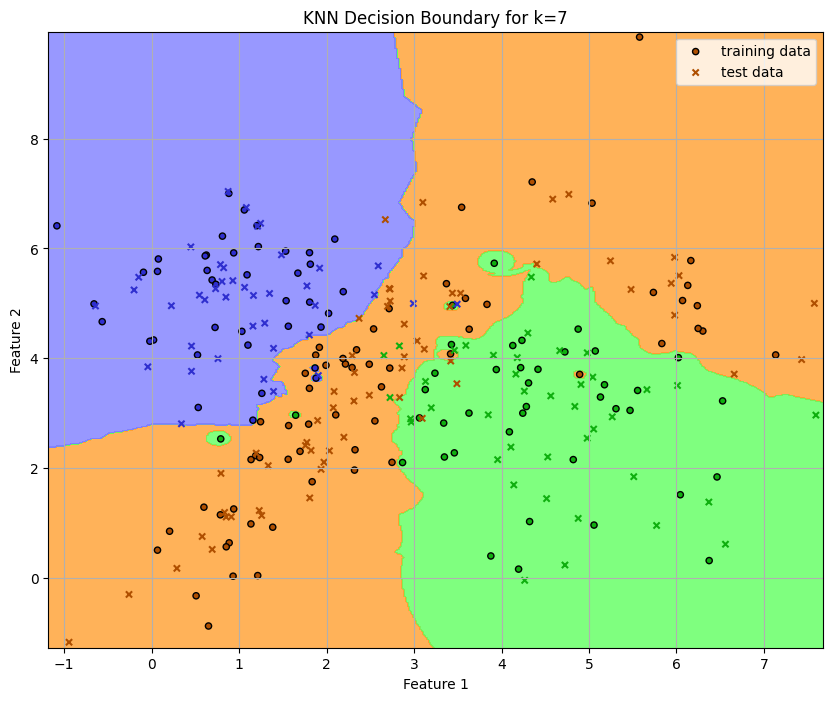

In [33]:
# test for different values of K
for k in range(1, 8):
    plot_k_neighbors(k, data_train, data_test)
    plt.show()


## $\star$ Part 2: Data splits and hyperparameters

Study how different dataset splits and values of k affect classification results.

### Part 2.1
Train and display k-nearest-neighbor models for different *equally sized* splits of the set into training and test set. Use fixed k=4.

Is the classification error always the same?

Average classification error (k = 4) :  0.14285714285714285


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


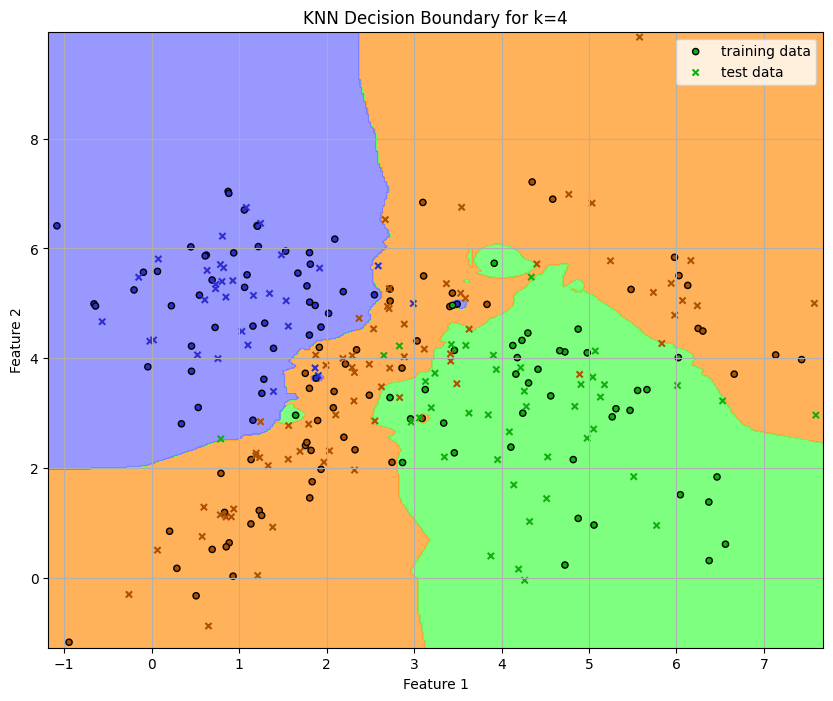

Average classification error (k = 4) :  0.15


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


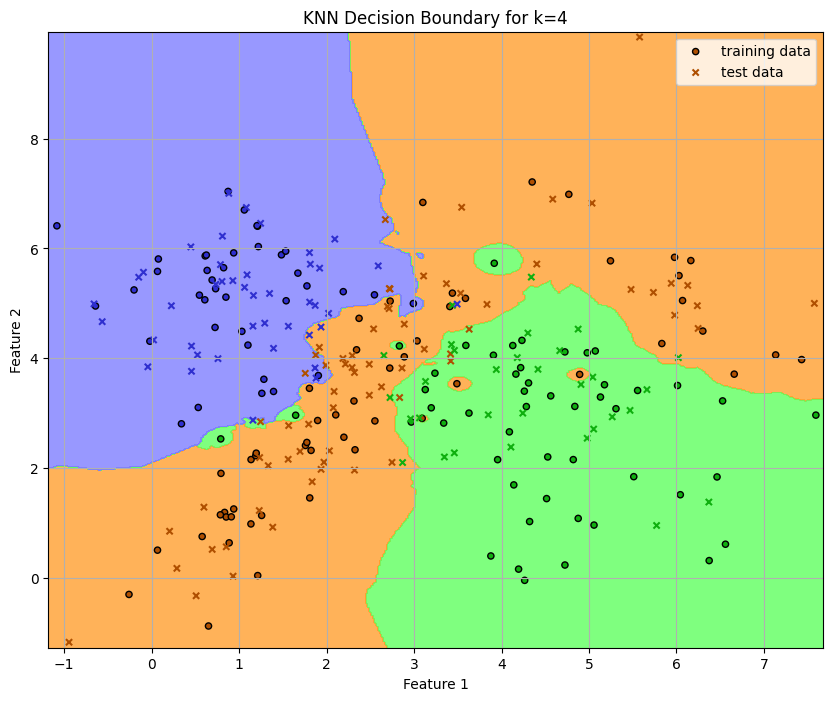

Average classification error (k = 4) :  0.12142857142857143


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


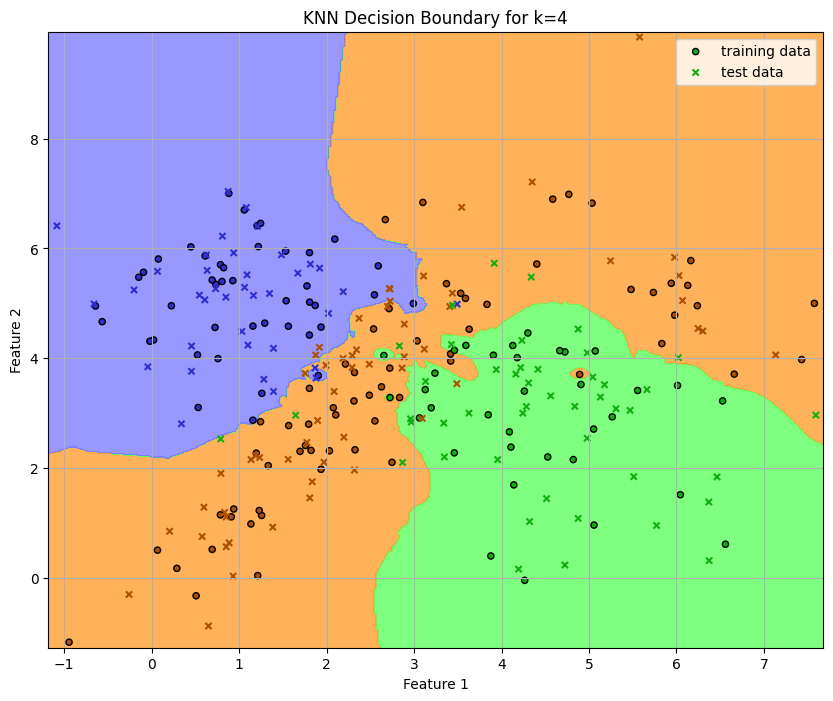

In [43]:
# fix K=4 and check how different random data splits change the result
# START TODO ################
k = 4
# we will split the data 3 times and plot the results
for i in range(3):
    test_size = 0.5
    X = dataset[:, :2]
    Y = dataset[: , -1]    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42+i)
    data_train = (X_train, Y_train)
    data_test = (X_test, Y_test)
    plot_k_neighbors(k, data_train, data_test)
    plt.show()
# END TODO ################


### Part 2.2
Train and display k-nearest-neighbor models for differently sized train/test splits. Use fixed k=4.

How does the classification error change?

Average classification error (k = 4) :  0.14285714285714285


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


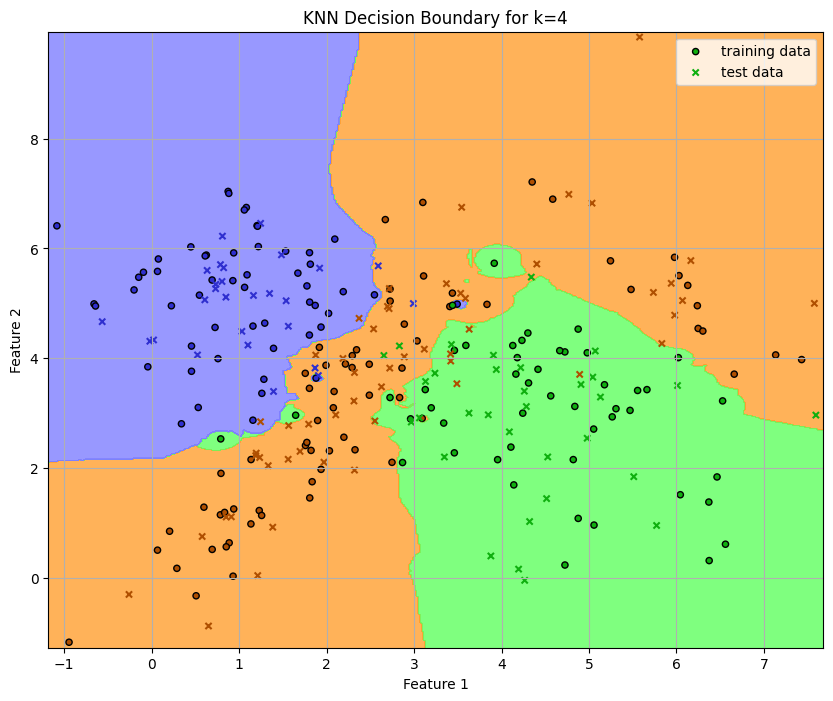

Average classification error (k = 4) :  0.14285714285714285


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


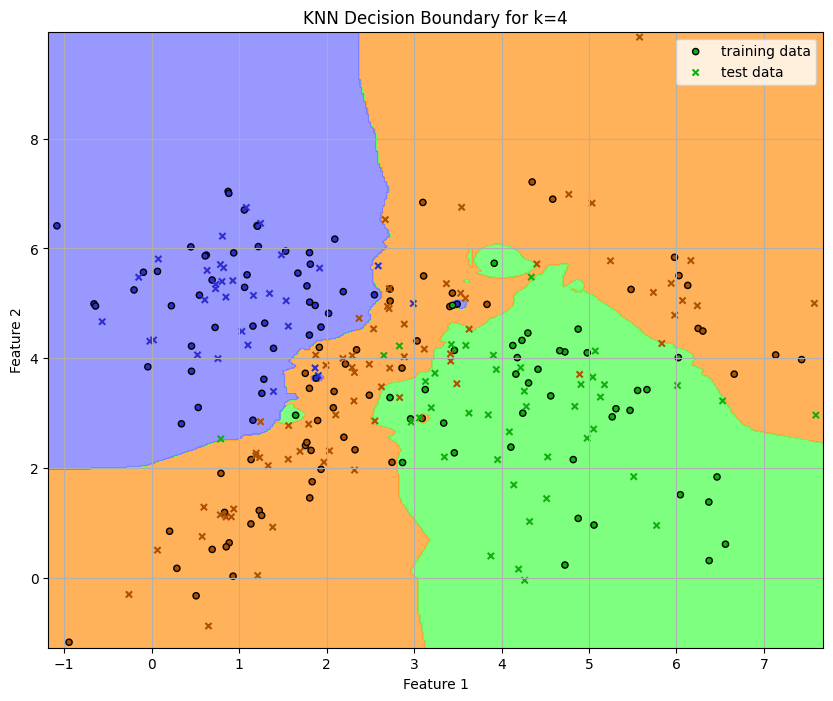

Average classification error (k = 4) :  0.14201183431952663


C:\Users\ppmen\AppData\Local\Temp\ipykernel_2732\1518937472.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[: , 0] , X_test[: , 1], c = Y_test, cmap = cmap_bold, edgecolor = 'k', s = 20, label = 'test data', marker = 'x')


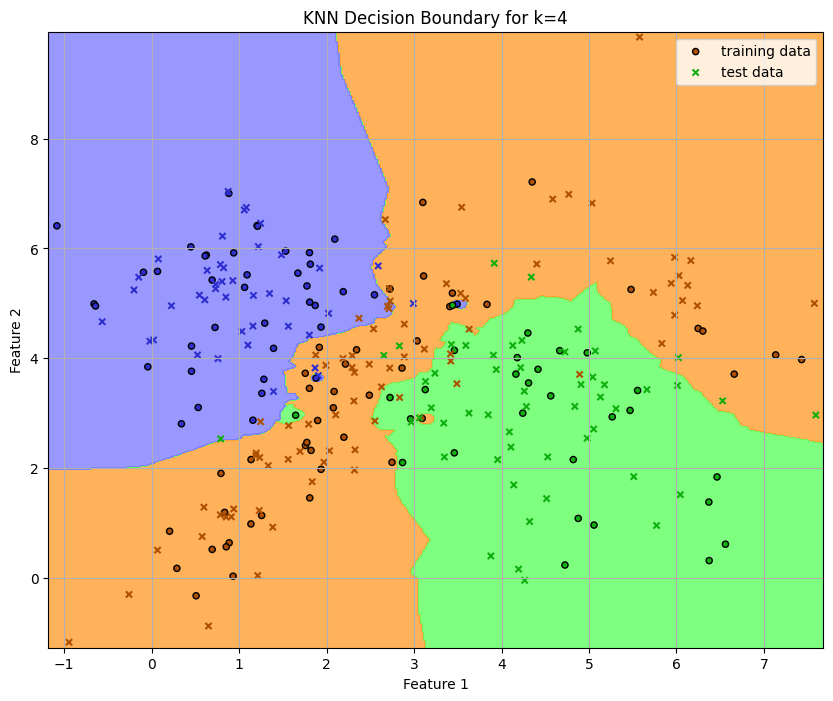

In [52]:
# fix K=4 and check how different training set sizes change the result
# START TODO ################
for i in range(3):
    i /= 10
    test_size = 0.4 + i
    X = dataset[:, :2]
    Y = dataset[: , -1]    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    data_train = (X_train, Y_train)
    data_test = (X_test, Y_test)
    plot_k_neighbors(4, data_train, data_test)
    plt.show()
        
# END TODO ################


### Part 2.3
Compute and plot the classification error for different values of k, averaged over multiple *equally sized* splits.

How is the mean error affected by k?

What you should observe is an effect illustrating the so-called bias-variance tradeoff and will be discussed in more detail in the next class.

In [ ]:
def get_classification_errors(data, k, n_trials):
    '''
    Run n_trials experiments with different (equally sized) train-test splits.
    Return a list of classification errors for each run.
    '''
    errors = []
    # START TODO ################
    raise NotImplementedError
    # END TODO ################
    return errors

ks = range(1, 50)
n_trials = 100
errors = []

# compute the mean classification error for each value of K and plot it as a function of K
# START TODO ################
raise NotImplementedError
# END TODO ################


## $\star\star\star$ Bonus part: Custom KNN estimator

Implement the same functionality as `KNeighborsClassifier`.

For this, you can create a new class `SimpleKNeighborsClassifier` and implement the methods `__init__`, `fit` and `predict`.

The general idea is to:

* Convert the class labels from {1, 2, 3} to {0, 1, 2}
* Convert the integer classes to [onehot vectors](https://en.wikipedia.org/wiki/One-hot#Machine_learning_and_statistics).
* Compute the distance from all test points to all training points.
* For each test point, sort the training points by ascending distance, only keep the top k datapoints, average the class probabilities of those k points and predict the class with the highest probability.
* Convert the classes back from {0, 1, 2} to {1, 2, 3}

Check if your estimator produces the same results as the estimator from `sklearn`.


### One-hot utility function

In [ ]:
def get_onehot_matrix(targets:np.ndarray, num_classes:int):
    # START TODO ################
    # targets shape (n_datapoints)
    # we want a matrix of shape (n_datapoints, num_classes) s. t.
    # entry[n, cls] = 1 if targets[n] == cls else 0
    raise NotImplementedError
    # END TODO ################

# test the onehot function with mockup targets
example_targets = np.array([1.,3.,0.])
num_classes = 5
example_onehot = get_onehot_matrix(
    example_targets, num_classes)

print(f"Given targets {example_targets} and {num_classes} classes,"
      "\nresulting onehot matrix is:\n"
      f"{example_onehot}")


In [ ]:
class SimpleKNeighborsClassifier:
    # START TODO ################
    raise NotImplementedError
    # END TODO ################


In [ ]:
print("---------- Custom implementation:")
plot_k_neighbors(4, data_train, data_test,
                 classifier=SimpleKNeighborsClassifier)
print()
print("---------- Implementation from sklearn:")
plot_k_neighbors(4, data_train, data_test,
                 classifier=KNeighborsClassifier)


## Hints

### Example output for Part 1

![example output](ex4_example_output.jpg)


### Creating contour plots

In [ ]:
### Creating contour plots

# create custom colormaps
cmap_light = ListedColormap(['#ff9f2f', '#5fff5f', '#7f7fff'])
cmap_bold = ListedColormap(['#af4f00', '#0faf0f', '#2f2fcf'])

# create some example data in sine form
data = np.random.uniform(-1.5, 1.5, size=(500,2))
data[:, 0] *= 3.14
x, y = data[:, 0], data[:, 1]

# set data classes with sine as border
y_border = np.sin(data[:, 0])
classes = (y > y_border).astype(float)

# plot points colored by classes with the created colormap
plt.figure(figsize=(12,8))
plt.scatter(data[:, 0], data[:, 1], c=classes, cmap=cmap_bold)
plt.grid()
plt.show()


In [ ]:
# create a meshgrid depending on data range
bordersize = .1
x_min, x_max = x.min() - bordersize, x.max() + bordersize
y_min, y_max = y.min() - bordersize, y.max() + bordersize

grid_size = .02
xrange = np.arange(x_min, x_max, grid_size)
yrange = np.arange(y_min, y_max, grid_size)
print(f"{xrange.shape=}, {yrange.shape=}")

xx, yy = np.meshgrid(xrange, yrange)
print(f"{xx.shape=}, {yy.shape=}")

# now xx maps from pixel position i, j to position x in the data

# classify each point in the meshgrid
zz = (yy > np.sin(xx)).astype(float)

# plot the contour of the true class distribution and the samples
plt.figure(figsize=(12,8))
plt.contourf(xx, yy, zz, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=classes, cmap=cmap_bold)
plt.grid()
plt.show()


### Handling data shapes

The sklearn predictor expects input of shape `(datapoints, features)`. To input your meshgrid, use `np.reshape` to flatten both `xx` and `yy` and then use `np.stack` to stack them in the last axis. Finally `reshape` the predictor's output back to your meshgrid shape and you can plot the contour.


### Inplace modification in numpy

Be mindful of whether you are working with *copies* or *views* of your data.

Comparison of copying and inplace modification in numpy:


In [ ]:
print(f"---------- Numpy ----------")
a = np.array([5])
b = a
b = b - 1
print(f"Copy:    {a} {b}")

a = np.array([5])
b = a
b -= 1
print(f"Inplace: {a} {b}")

print(f"---------- Python ----------")
a = 5
b = a
b = b - 1
print(f"Copy:    {a} {b}")

a = 5
b = a
b -= 1
print(f"Inplace: {a} {b}")
